In [60]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In this file, we explore different ways to detrend a time series containing housing prices for a single region (state or county). Though we only show the results for a single region, we tested each method on many regions and compared the results.

The time series data for housing prices in a region is not covariance stationary, so we want to decompose/detrend our data into a time series that is more likely to be covariance stationary and therefore is more suitable 

In [66]:
def detrend(time_series):
    def _moving_average(series, m=12):
        if len(series) < m:
            raise ValueError("Window size cannot be larger than the array length.")
        
        ret = np.cumsum(series, dtype=float)
        ret[m:] = ret[m:] - ret[:-m]
        return ret[m - 1:] / m
    return _moving_average(time_series)

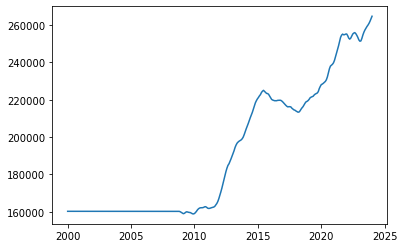

In [61]:
df = pd.read_csv("Data_Files/price_by_state_cleaned.csv")
label_df = pd.read_csv("Data_Files/state_data_labels.csv")
state = "Arizona"

t_vals = df["Unnamed: 0"].values
time_series = df["North Dakota"].values
plt.plot(np.linspace(2000, 2024, len(time_series)), time_series)

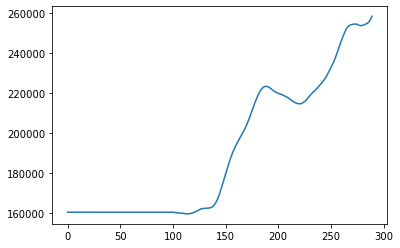

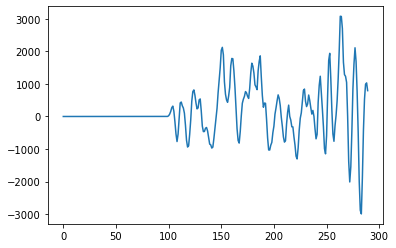

In [62]:
# detrend using yearly moving average
def moving_average(arr, window_size):
    if len(arr) < window_size:
        raise ValueError("Window size cannot be larger than the array length.")
    
    ret = np.cumsum(arr, dtype=float)
    ret[window_size:] = ret[window_size:] - ret[:-window_size]
    return ret[window_size - 1:] / window_size

ma = moving_average(time_series, 12)
plt.plot(ma)
plt.show()
plt.plot(time_series[6:-5] - ma)
plt.show()

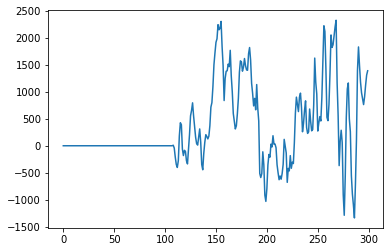

In [63]:
# detrend by differencing
difference = np.diff(time_series)
plt.plot(difference)
plt.show()

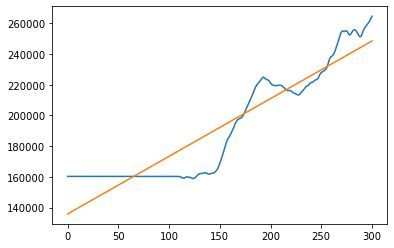

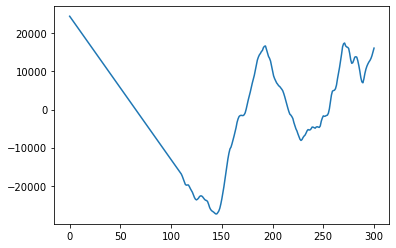

In [64]:
# detrend using linear regression
x = np.linspace(2000, 2024, len(time_series))
regressor = LinearRegression().fit(x.reshape(-1, 1), time_series.reshape(-1, 1))
best_fit_line = regressor.coef_[0][0] * x + regressor.intercept_[0]

plt.plot(time_series)
plt.plot(best_fit_line)
plt.show()

plt.plot(time_series - best_fit_line)
plt.show()

